# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_multiagent.app', seed=15)
# env = UnityEnvironment(file_name='Reacher.app', seed=15)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.94036865e+00  -1.00000000e+00
  -9.74956512e-01   0.00000000e+00   1.00000000e+00   0.00000000e+00
   2.90312499e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
# import libraries
import random
import time 
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# import Agent Module 
from ddpg_agent import Agent

In [8]:
DISPLAY_EVERY = 10 # display result every DISPLAY_EVERY episodes
SOLVED_SCORE = 30 # threshold for solving the environment  
THRESHOLD_SCORE = 36 # threshold for terminating the training 
NUM_EPISODES = 250 # number of episodes for training

def ddpg(n_episodes): 
    """
    This function is used for training the DDPG agent 
    and outputs the trained agent, history of the accumulated reward averaged over all the agents for each episode, 
    as well as history of the accumulated reward averaged over all the agents for the last 100 episodes
    
    """
    
    # DDPG agent
    agent = Agent(state_size, action_size, seed = 1)
    
    # for storing the accumulated reward averaged over all the agents for each episode
    scores_whole_history = []
    # for storing the accumulated reward averaged over all the agents for the last 100 episodes 
    scores_part_history = deque(maxlen=100)
    # for storing the history of the accumulated reward averaged over all the agents and over the last 100 episodes
    average_scores_whole_history = []
    # best average score (over all the agents, over the last 100 episodes)
    best_average_score = 0.0 
    # if the environment is solved or note
    is_solved = False
    
    print('----- training started! -----')
    start_time = time.time() # start time
    
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode = True)[brain_name]    # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()                                          # reset the noise and counter for time step      
        
        while True:
            actions = agent.act(states)                        # select actions based on the current policy 
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            agent.step(states, actions, rewards, next_states, dones) # store the experience tuple and learn 
            states = next_states                               # roll over states to next time step
            
            if np.any(dones):                                  # exit loop if episode finished for at least one agent
                break
                
        # compute the accumulated reward averaged over all the agents
        score_episode = np.mean(scores)
        scores_whole_history.append(score_episode) 
        scores_part_history.append(score_episode)
        # compute the accumulated reward averaged over all the agents and over the last 100 episodes
        average_score = np.mean(scores_part_history)
        average_scores_whole_history.append(average_score)

        # is the environment solved nor not
        if (is_solved == False) and (best_average_score > SOLVED_SCORE):
            is_solved = True
            print('----- environment solved at episode {} -----'.format(i_episode))
            print('average score (over all agents, last 100 episodes): {:.2f}'.format(average_score))        

        # save the model if the best average_score is achieved 
        if average_score > best_average_score:
            best_average_score = average_score # update best average scoree

        # display the status of training 
        if i_episode % DISPLAY_EVERY == 0:
            elapsed_time = time.time() - start_time # compute the elapsed time
            
            print('----- episode {} -----'.format(i_episode))
            print('average score (over all agents, last 100 episodes): {:.2f}, elapsed time: {:.2f}'.format(average_score, elapsed_time))
            
            start_time = time.time() # initialize the starting time          
            
        # if the accumulated reward averaged over all the agents and over the last 100 episodes 
        # reaches THRESHOLD_SCORE or higher, terminate the training 
        if average_score > THRESHOLD_SCORE:
            elapsed_time = time.time() - start_time # compute the elapsed time
            
            print('----- training terminated at episode {} -----'.format(i_episode))
            print('average total score (over all agents, last 100 episodes): {:.2f}, elapsed time: {:.2f}'.format(average_score, elapsed_time))
        
            break

    torch.save(agent.actor_local.state_dict(), 'check_point_actor.pth')
    torch.save(agent.critic_local.state_dict(), 'check_point_critic.pth') 
    # print('best average score (over all agents, last 100 episodes): {:.2f}'.format(best_average_score))
    
    return agent, scores_whole_history, average_scores_whole_history

agent, scores_whole_history, average_scores_whole_history = ddpg(NUM_EPISODES)

----- training started! -----
----- episode 10 -----
average score (over all agents, last 100 episodes): 1.36, elapsed time: 97.17
----- episode 20 -----
average score (over all agents, last 100 episodes): 2.78, elapsed time: 98.24
----- episode 30 -----
average score (over all agents, last 100 episodes): 8.40, elapsed time: 102.78
----- episode 40 -----
average score (over all agents, last 100 episodes): 15.76, elapsed time: 105.39
----- episode 50 -----
average score (over all agents, last 100 episodes): 20.17, elapsed time: 104.09
----- episode 60 -----
average score (over all agents, last 100 episodes): 23.07, elapsed time: 98.73
----- episode 70 -----
average score (over all agents, last 100 episodes): 24.97, elapsed time: 102.11
----- episode 80 -----
average score (over all agents, last 100 episodes): 26.37, elapsed time: 99.28
----- episode 90 -----
average score (over all agents, last 100 episodes): 27.54, elapsed time: 102.24
----- episode 100 -----
average score (over all ag

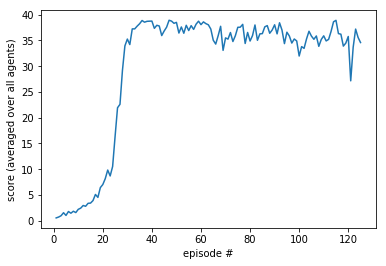

In [9]:
# plot the accumulated reward averaged over all the agents

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_whole_history)+1), scores_whole_history)
plt.ylabel('score (averaged over all agents)')
plt.xlabel('episode #')
plt.savefig('scores.eps')
plt.show()

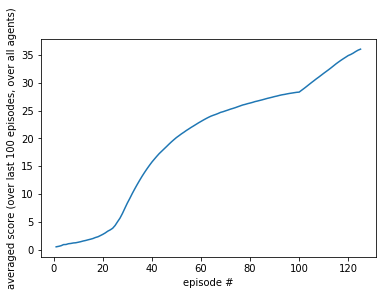

In [10]:
# plot the accumulated reward averaged over all the agents and over the last 100 episodes 

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(average_scores_whole_history)+1), average_scores_whole_history)
plt.ylabel('averaged score (over last 100 episodes, over all agents)')
plt.xlabel('episode #')
plt.savefig('average_scores.eps')
plt.show()

In [12]:
# # display the performance of the trained agent

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

# agent = Agent(state_size, action_size, seed = 1)
file_name_weights_actor = 'check_point_actor.pth'
file_name_weights_critic = 'check_point_critic.pth'

# # load the model with the best average score 
agent.actor_local.load_state_dict(torch.load(file_name_weights_actor))
agent.critic_local.load_state_dict(torch.load(file_name_weights_critic))       

agent.reset()

while True:
    actions = agent.act(states)                        # select actions based on the current policy 
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    agent.step(states, actions, rewards, next_states, dones) # store the experience tuple and learn 
    states = next_states                               # roll over states to next time step
            
    if np.any(dones):                                  # exit loop if episode finished for at least one agent
        break

print('score (averaged over all agents): {}'.format(np.mean(scores)))

score (averaged over all agents): 34.559999227523804


In [13]:
env.close()